In [6]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import (
    AnalyzeDocumentRequest,
    AnalyzeResult
)


endpoint = "https://doc-int-mihail3816-001.cognitiveservices.azure.com/"
key = "1I6aasAt0FZGG1e1qhUqMb02vQHbKnEVpIS7uPhIwyFUlOqSTvZGJQQJ99BCACYeBjFXJ3w3AAALACOGLuzg"
# docUrl = "https://documentintelligence.ai.azure.com/documents/samples/layout/layout-pageobject.pdf"
filePath = "sample_pdf/eld_proper.pdf"



In [7]:
document_intelligence_client = DocumentIntelligenceClient(endpoint=endpoint, credential=AzureKeyCredential(key))

# poller = document_intelligence_client.begin_analyze_document(
#     "prebuilt-layout", AnalyzeDocumentRequest(url_source=docUrl), output_content_format="markdown"
# )


poller = document_intelligence_client.begin_analyze_document(
    "prebuilt-layout", AnalyzeDocumentRequest(bytes_source=open(filePath, "rb").read()), output_content_format="markdown"
)

result: AnalyzeResult = poller.result()


In [ ]:
# Save result to .json
result_dict_out = result.as_dict()

import json
json_filename = "output/AzureDocInt_eld.json"
with open(json_filename, "w", encoding="utf-8") as fw:
    # json.dump(out, fw, indent=indent)
    json.dump(result_dict_out, fw, ensure_ascii=False, indent= 4)

In [9]:
# Save markdown content to file
output_file = "output/AzureDocInt_eld.md"
with open(output_file, "w", encoding="utf-8") as f:
    f.write(result.content)

### Paragraphs 

In [39]:
def get_paragraphs(result):
    paragraphs = {}
    for idx, paragraph in enumerate(result.paragraphs):
        item = {
            "id": "/paragraphs/" + str(idx),
            "content": paragraph.content if paragraph.content else "",
            "role": paragraph.role if paragraph.role else "",
            "polygon": paragraph.get("boundingRegions")[0]["polygon"],
            "pageNumber": paragraph.get("boundingRegions")[0]["pageNumber"]
        }
        paragraphs[idx]=item
    return paragraphs

paragraphs = get_paragraphs(result)


paragraphs[0]["content"]

'医薬品リスク管理計画対象製品'

### Sections
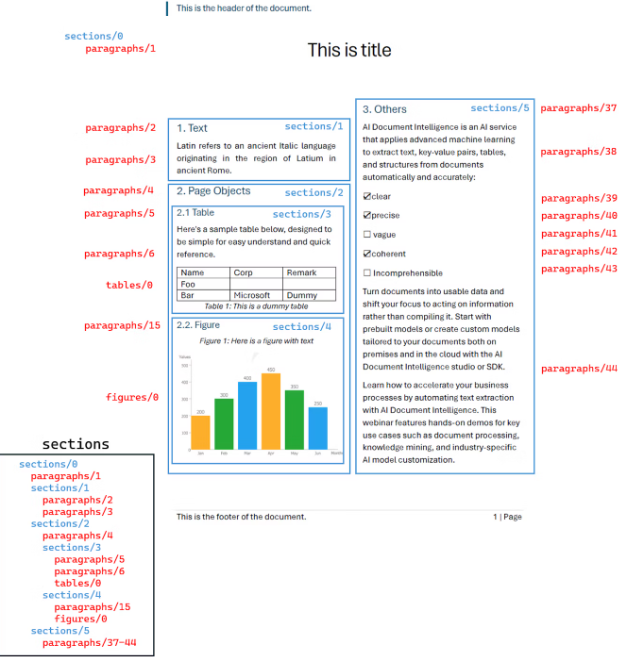

In [ ]:


# get_sections(result)

[['/sections/1',
  '/sections/3',
  '/sections/5',
  '/sections/11',
  '/sections/19',
  '/sections/23',
  '/sections/26',
  '/sections/29',
  '/sections/30',
  '/sections/33',
  '/sections/40',
  '/sections/42',
  '/sections/43',
  '/sections/44',
  '/sections/45',
  '/sections/47',
  '/sections/76',
  '/sections/79',
  '/sections/82',
  '/sections/86',
  '/sections/91',
  '/sections/96',
  '/sections/97',
  '/sections/98',
  '/sections/99',
  '/sections/113',
  '/sections/114',
  '/sections/115',
  '/sections/117',
  '/sections/123',
  '/sections/125',
  '/sections/127',
  '/sections/128',
  '/sections/138',
  '/sections/144',
  '/sections/147',
  '/sections/148',
  '/sections/156',
  '/sections/157',
  '/sections/161',
  '/sections/162',
  '/sections/167',
  '/sections/186',
  '/sections/195',
  '/sections/208',
  '/sections/222',
  '/sections/226',
  '/sections/227',
  '/sections/228',
  '/sections/233',
  '/sections/235',
  '/sections/236',
  '/sections/237',
  '/sections/249',
  

In [41]:
def get_sections(result):
    sections = []
    for section in result.sections:
        sections.append(section.elements)
    return sections

"""
データ構造を階層構造に変換するための再帰的探索アルゴリズム
（print文の出力をtxtファイルに保存）
"""

def explore_sections(input_data, indices, file, depth=0):
    indent = ' ' * depth  # 階層に応じたインデント
    for idx in indices:
        if idx < len(input_data):
            for path in input_data[idx]:
                number = int(path.split('/')[-1])
                if "paragraphs" in path:
                    number = int(path.split('/')[-1])
                    para_head = paragraphs[number]["content"]
                    line = indent + f"{idx}: {path} : {para_head}"
                else:
                    line = indent + f"{idx}: {path}"

                print(line)
                file.write(line + '\n')  # ファイルにも書き込む
                if 'sections' in path:
                    # number = int(path.split('/')[-1])
                    # 再帰的にさらにそのセクションを探索
                    explore_sections(input_data, [number], file, depth + 2)

def generate_hierarchy(input_data, filename="output/AzureDocInt_eld_structure.txt"):
    initial_indices = [0]
    # Save  階層構造 to file
    with open(filename, 'w', encoding='utf-8') as file:
        explore_sections(input_data, initial_indices, file)

# 階層構造を生成して、output.txtに書き出す
result_structure = generate_hierarchy(get_sections(result))

0: /sections/1
  1: /paragraphs/2 : 適正使用ガイド
  1: /sections/2
    2: /paragraphs/3 : 監修医
    2: /paragraphs/4 : 横浜市立大学附属市民総合医療センター泌尿器·腎移植科診療教授 上村 博司 先生
    2: /figures/0
    2: /paragraphs/10 : 2. 禁忌(次の患者には投与しないこと)
    2: /paragraphs/11 : 2.1 本剤の成分に対し過敏症の既往歴のある患者
    2: /paragraphs/12 : 2.2 ニルマトレルビル·リトナビル、エンシトレルビル フマル酸、レナカパビル ナトリウムを投与中の患者[10.1参照]
    2: /paragraphs/13 : 2025年2月改訂
    2: /paragraphs/14 : Johnson&Johnson
    2: /figures/1
0: /sections/3
  3: /paragraphs/16 : アーリーダ®による治療の流れと注意事項
  3: /paragraphs/17 : 本剤の投与に際しては、治療上の必要性を十分に検討の上、本剤の投与の可否を判断してください。
  3: /figures/2
  3: /paragraphs/43 : 適正使用に関する アーリーダ®治療を
  3: /paragraphs/45 : 患者·家族への 事前説明
  3: /paragraphs/46 : 重要な副作用
  3: /paragraphs/47 : 特に注意を要する
  3: /paragraphs/48 : 副作用
  3: /paragraphs/49 : 発現のおそれのある
  3: /tables/0
  3: /sections/4
    4: /paragraphs/107 : 開始前の確認事項
    4: /paragraphs/108 : 事前説明 患者·家族への
    4: /paragraphs/109 : 重要な副作用 特に注意を要する
    4: /paragraphs/110 : 副作用 発現のおそれのある
0: /sections/5
  5: /paragraphs/113 : 適正使

### Tables

In [18]:
def get_tables(result):
    tables = []
    for table_idx, table in enumerate(result.tables):
        cells = []
        for cell in table.cells: 
            cells.append( {
                "row_index": cell.row_index,
                "column_index": cell.column_index,
                "content": cell.content,
            })
        tab = {
                "row_count": table.row_count,
                "column_count": table.column_count,
                "cells": cells
        }
        tables.append(tab)
        return tables
    
get_tables(result)


[{'row_count': 26,
  'column_count': 2,
  'cells': [{'row_index': 0, 'column_index': 0, 'content': 'CONTENTS'},
   {'row_index': 1, 'column_index': 0, 'content': 'アーリーダ®による治療の流れと注意事項'},
   {'row_index': 1, 'column_index': 1, 'content': '2'},
   {'row_index': 2, 'column_index': 0, 'content': '適正使用に関するお願い'},
   {'row_index': 2, 'column_index': 1, 'content': '4'},
   {'row_index': 3, 'column_index': 0, 'content': 'アーリーダ®治療を開始前の確認事項'},
   {'row_index': 3, 'column_index': 1, 'content': '5'},
   {'row_index': 4, 'column_index': 0, 'content': '(1)患者選択基準'},
   {'row_index': 4, 'column_index': 1, 'content': '5'},
   {'row_index': 5, 'column_index': 0, 'content': '(2)効能又は効果'},
   {'row_index': 5, 'column_index': 1, 'content': '7'},
   {'row_index': 6, 'column_index': 0, 'content': '(3)用法及び用量'},
   {'row_index': 6, 'column_index': 1, 'content': '7'},
   {'row_index': 7, 'column_index': 0, 'content': '(4)適用上の注意'},
   {'row_index': 7, 'column_index': 1, 'content': '7'},
   {'row_index': 8, 'column_

In [25]:
result.tables[0]

{'rowCount': 26, 'columnCount': 2, 'cells': [{'rowIndex': 0, 'columnIndex': 0, 'columnSpan': 2, 'content': 'CONTENTS', 'boundingRegions': [{'pageNumber': 3, 'polygon': [0.5396, 0.9156, 7.3484, 0.9066, 7.3484, 1.2314, 0.5396, 1.2314]}], 'spans': [{'offset': 1190, 'length': 8}], 'elements': ['/paragraphs/52']}, {'rowIndex': 1, 'columnIndex': 0, 'content': 'アーリーダ®による治療の流れと注意事項', 'boundingRegions': [{'pageNumber': 3, 'polygon': [0.5396, 1.2314, 5.714, 1.2314, 5.714, 1.9352, 0.5396, 1.9171]}], 'spans': [{'offset': 1219, 'length': 19}], 'elements': ['/paragraphs/53']}, {'rowIndex': 1, 'columnIndex': 1, 'content': '2', 'boundingRegions': [{'pageNumber': 3, 'polygon': [5.714, 1.2314, 7.3484, 1.2314, 7.3575, 1.9352, 5.714, 1.9352]}], 'spans': [{'offset': 1248, 'length': 1}], 'elements': ['/paragraphs/54']}, {'rowIndex': 2, 'columnIndex': 0, 'content': '適正使用に関するお願い', 'boundingRegions': [{'pageNumber': 3, 'polygon': [0.5396, 1.9171, 5.714, 1.9352, 5.714, 2.4134, 0.5396, 2.4134]}], 'spans': [{'off

In [ ]:
from PIL import Image
import fitz  # PyMuPDF
import mimetypes
from mimetypes import guess_type
def crop_image_from_image(image_path, page_number, bounding_box):
    """
    Crops an image based on a bounding box.

    :param image_path: Path to the image file.
    :param page_number: The page number of the image to crop (for TIFF format).
    :param bounding_box: A tuple of (left, upper, right, lower) coordinates for the bounding box.
    :return: A cropped image.
    :rtype: PIL.Image.Image
    """
    with Image.open(image_path) as img:
        if img.format == "TIFF":
            # Open the TIFF image
            img.seek(page_number)
            img = img.copy()
            
        # The bounding box is expected to be in the format (left, upper, right, lower).
        cropped_image = img.crop(bounding_box)
        return cropped_image

def crop_image_from_pdf_page(pdf_path, page_number, bounding_box):
    """
    Crops a region from a given page in a PDF and returns it as an image.

    :param pdf_path: Path to the PDF file.
    :param page_number: The page number to crop from (0-indexed).
    :param bounding_box: A tuple of (x0, y0, x1, y1) coordinates for the bounding box.
    :return: A PIL Image of the cropped area.
    """
    doc = fitz.open(pdf_path)
    page = doc.load_page(page_number)
    
    # Cropping the page. The rect requires the coordinates in the format (x0, y0, x1, y1).
    # The coordinates are in points (1/72 inch).
    bbx = [x * 72 for x in bounding_box]
    rect = fitz.Rect(bbx)
    pix = page.get_pixmap(matrix=fitz.Matrix(300/72, 300/72), clip=rect)
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    doc.close()

    return img

def crop_image_from_file(file_path, page_number, bounding_box):
    """
    Crop an image from a file.

    Args:
        file_path (str): The path to the file.
        page_number (int): The page number (for PDF and TIFF files, 0-indexed).
        bounding_box (tuple): The bounding box coordinates in the format (x0, y0, x1, y1).

    Returns:
        A PIL Image of the cropped area.
    """
    mime_type = mimetypes.guess_type(file_path)[0]
    
    if mime_type == "application/pdf":
        return crop_image_from_pdf_page(file_path, page_number, bounding_box)
    else:
        return crop_image_from_image(file_path, page_number, bounding_box)


##### **参考**
* 【最新】Azure AI Document Intelligence による文書構造の解析（Markdown、図、セクション）:
https://qiita.com/nohanaga/items/1263f4a6bc909b6524c8
* Azure AI Document Intelligence client library for Python (Docs):
https://azuresdkdocs.z19.web.core.windows.net/python/azure-ai-documentintelligence/latest/index.html